In [1]:
# Video Evaluation. Needs "videos_clean.csv" as input.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import researchpy as rp
from scipy import stats

# set the format for pandas float 
pd.options.display.float_format = '{:,.3f}'.format

# deactivate graph settings, because like this it appears better in notebook
# # change font to latex font
# rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
# rc('text', usetex=True)

# # change font sizes for all elements
# TICKS_AND_LEGEND_SIZE = 16
# AXES_TITLE_SIZE = 22
# PLOT_TITLE_SIZE = 22

# plt.rc('font', size=TICKS_AND_LEGEND_SIZE)          # controls default text sizes
# plt.rc('axes', titlesize=PLOT_TITLE_SIZE)     # fontsize of the axes title
# plt.rc('axes', labelsize=AXES_TITLE_SIZE)    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=TICKS_AND_LEGEND_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=TICKS_AND_LEGEND_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=TICKS_AND_LEGEND_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=PLOT_TITLE_SIZE)  # fontsize of the figure title

In [2]:
# read in video csv file
df = pd.read_csv("videos_clean.csv")

# check data
print('shape', df.shape)
df.head(5)

shape (40, 42)


,phone,count,lvl,implementation,sus,priorExp,t1_time,t1_hint_pt,t1_hint_ar,t1_pinch,...,m2_hint_ar,m2_pinch,m2_tfr,m2_offscrn,m3_time,m3_hint_pt,m3_hint_ar,m3_pinch,m3_tfr,m3_offscrn
0,0,5,0,TM0,55.000,1,16,0,0,0,...,0,0,0,0,18,0,0,0,0,0
1,0,11,2,TM2,65.000,1,13,0,0,0,...,0,0,0,0,69,0,0,0,0,0
2,0,9,1,MT1,80.000,1,14,0,0,0,...,0,0,0,0,61,0,0,0,0,0
3,0,2,1,MT1,62.500,0,11,0,0,0,...,0,0,0,0,117,0,0,0,0,0
4,0,3,1,TM1,67.500,1,21,0,0,0,...,0,0,0,0,145,1,0,0,0,0


In [3]:
# replace the -1 markers by nan markers, which do not have an issue.
df=df.replace(-1,np.nan)
df[(df.t3_time==-1)]


,phone,count,lvl,implementation,sus,priorExp,t1_time,t1_hint_pt,t1_hint_ar,t1_pinch,...,m2_hint_ar,m2_pinch,m2_tfr,m2_offscrn,m3_time,m3_hint_pt,m3_hint_ar,m3_pinch,m3_tfr,m3_offscrn


APPEARANCES OF TWO-FINGER ROTATION AND PINCH ZOOMS PER TASK


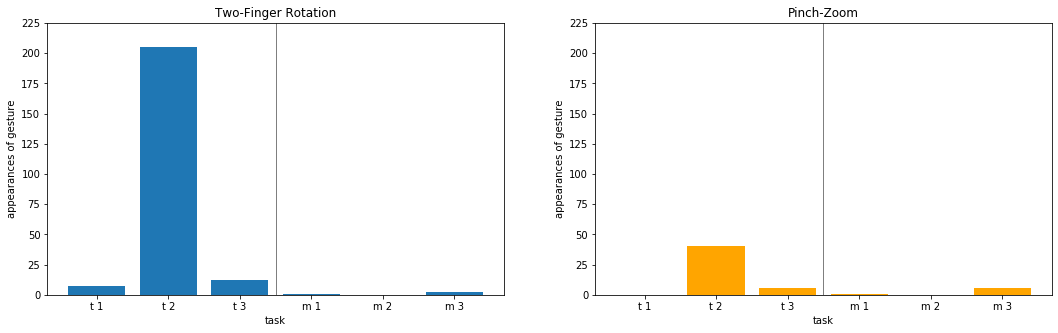

In [4]:
print('APPEARANCES OF TWO-FINGER ROTATION AND PINCH ZOOMS PER TASK')
TFR = [df.loc[:,"t1_tfr"].sum(), df.loc[:,"t2_tfr"].sum(), df.loc[:,"t3_tfr"].sum(), df.loc[:,"m1_tfr"].sum(), df.loc[:,"m2_tfr"].sum(), df.loc[:,"m3_tfr"].sum()]
PZ = [df.loc[:,"t1_pinch"].sum(), df.loc[:,"t2_pinch"].sum(), df.loc[:,"t3_pinch"].sum(), df.loc[:,"m1_pinch"].sum(), df.loc[:,"m2_pinch"].sum(), df.loc[:,"m3_pinch"].sum()]

fig, axs = plt.subplots(1, 2, figsize=(18, 5))

axs[0].bar(height=TFR, x=["t 1","t 2","t 3","m 1","m 2","m 3"])
axs[0].set_ylim([0,225])
axs[0].axvline(x=2.5, linewidth=0.5, color='black')
axs[0].set_title("Two-Finger Rotation")
axs[0].set_xlabel("task")
axs[0].set_ylabel("appearances of gesture")

axs[1].bar(height=PZ, x=["t 1","t 2","t 3","m 1","m 2","m 3"], color='orange')
axs[1].set_ylim([0,225])
axs[1].axvline(x=2.5, linewidth=0.5, color='black')
axs[1].set_title("Pinch-Zoom")
axs[1].set_xlabel("task")
axs[1].set_ylabel("appearances of gesture")

plt.show()

BOXPLOTS FOR GESTURE APPEARANCES AND TIMES PER TASK
Difference to report: 0 appearances are in the graphic, because low or no data points would lead to irretating plots


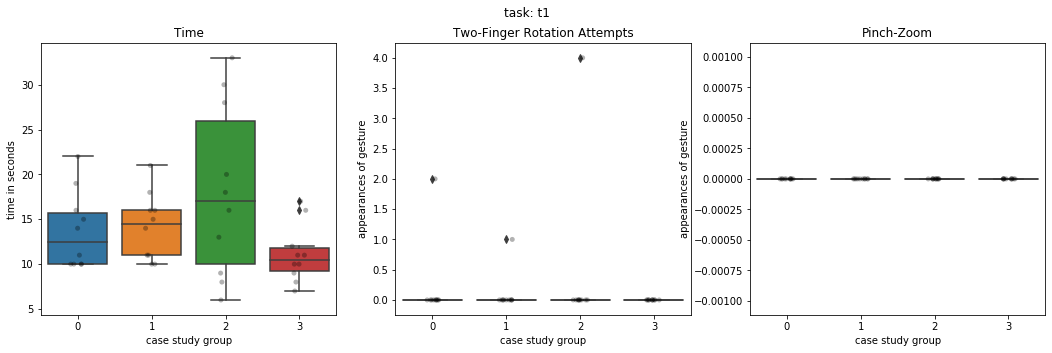

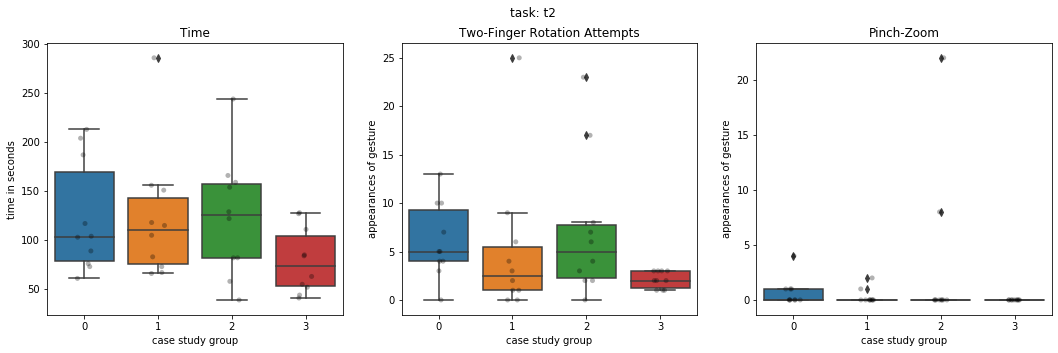

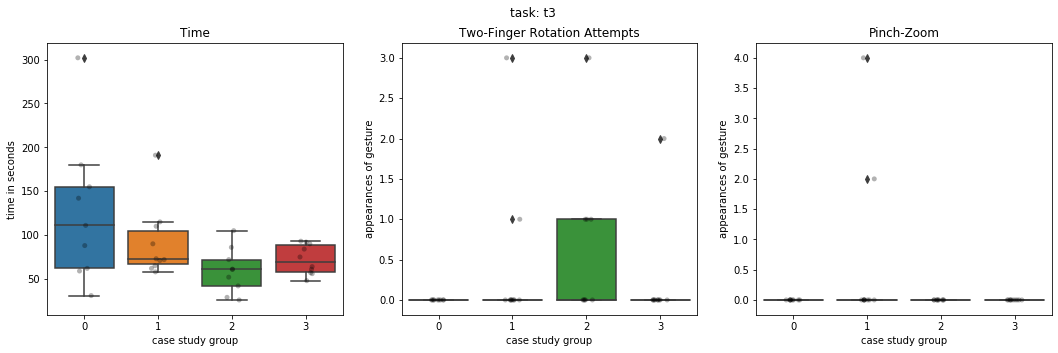

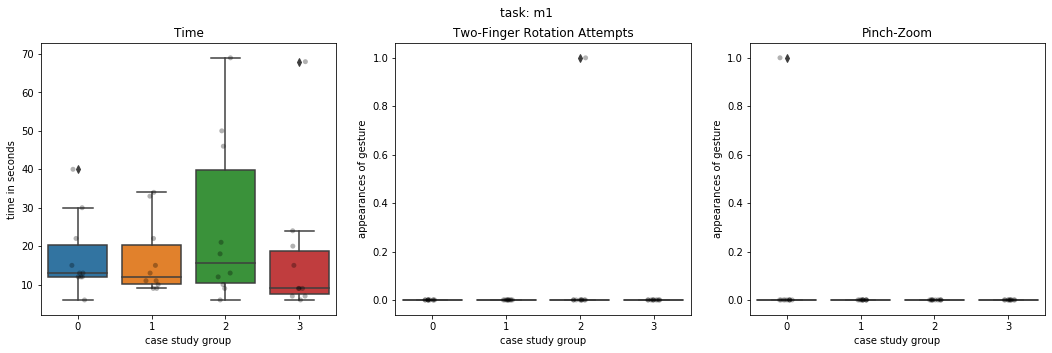

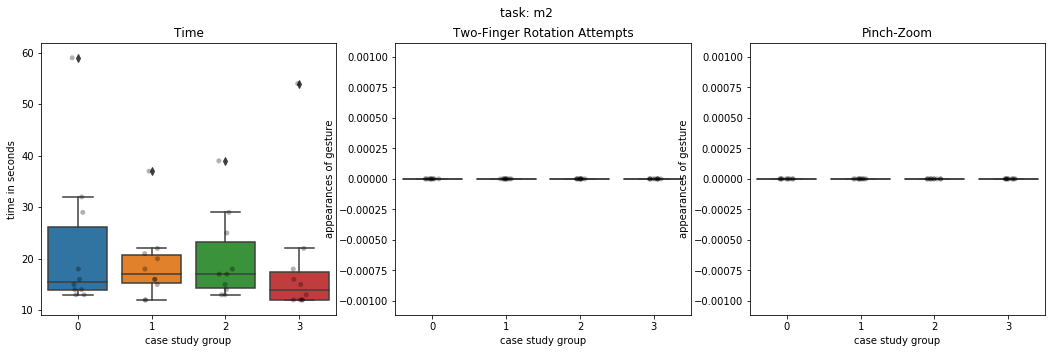

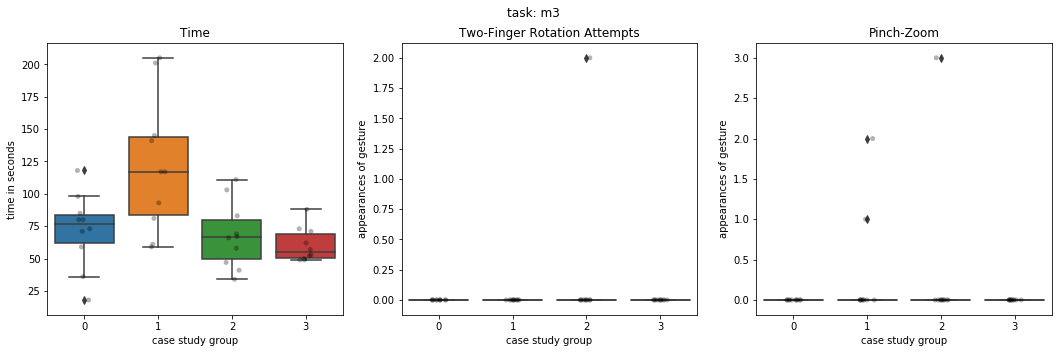

In [5]:
print('BOXPLOTS FOR GESTURE APPEARANCES AND TIMES PER TASK')
print('Difference to report: 0 appearances are in the graphic, because low or no data points would lead to irretating plots')
task_names = ['t1','t2','t3','m1','m2','m3']
for task in task_names:
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    col_str = task + '_time'
    sns.boxplot(y=df[col_str], x=df["lvl"], whis=1.5, ax=axs[0])
    sns.stripplot(y=df[col_str], x=df["lvl"], jitter=True, marker='o', alpha=0.3,color='black', ax=axs[0])
    axs[0].set_title("Time")
    axs[0].set_ylabel("time in seconds")

    col_str = task + '_tfr'
    df_nonzero = df#[df[col_str] != 0] #for excluding zero-instances (does not work with the plot function)
    sns.boxplot(y=col_str, x="lvl", data=df_nonzero, whis=1.5, ax=axs[1])
    sns.stripplot(y=df_nonzero[col_str], x=df_nonzero["lvl"], jitter=True, marker='o', alpha=0.3,color='black', ax=axs[1])
    axs[1].set_title("Two-Finger Rotation Attempts")
    axs[1].set_ylabel("appearances of gesture")

    col_str = task + '_pinch'
    df_nonzero = df#df[df[col_str] != 0]
    sns.boxplot(y=col_str, x="lvl", data=df_nonzero, whis=1.5, ax=axs[2])
    sns.stripplot(y=df_nonzero[col_str], x=df_nonzero["lvl"], jitter=True, marker='o', alpha=0.3,color='black', ax=axs[2])
    axs[2].set_title("Pinch-Zoom")
    axs[2].set_ylabel("appearances of gesture")

    for a in axs:
        a.set_xlabel('case study group')

    plt.suptitle(('task: ' + task))
    plt.show()



make: plot_scatter.pdf
Correlation matrix: (Pearsons CC)
 [[1.         0.42880902]
 [0.42880902 1.        ]]


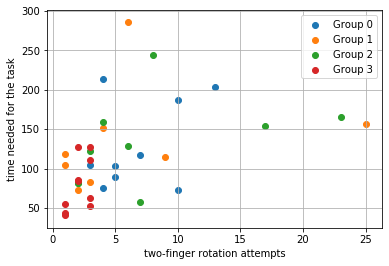

In [6]:
print('make: plot_scatter.pdf')
df_t2_corr = df.loc[:,['lvl','t2_tfr','t2_time']][df.t2_tfr != 0]
df.loc[:,'group'] = df.loc[:,'lvl']

print("Correlation matrix: (Pearsons CC)\n", np.corrcoef(x=df_t2_corr["t2_tfr"], y=df_t2_corr['t2_time']))

df_t2_corr = df.loc[:,['lvl','t2_tfr','t2_time']][df.t2_tfr != 0]
df.loc[:,'group'] = df.loc[:,'lvl']

for i in range(4):
    plt.scatter(x=df_t2_corr[df['group']==i]['t2_tfr'], y=df_t2_corr[df['group']==i]['t2_time'], edgecolors='face')
plt.grid('on')
plt.xlabel('two-finger rotation attempts')
plt.ylabel('time needed for the task')
plt.legend(['Group 0','Group 1','Group 2','Group 3'])
#plt.savefig('plot_scatter.pdf', bbox_inches='tight')
plt.show()
#plt.figure()

# Statistics
- There are statistical tests for 3 parameters: time, two-finger rotations (tfr) and pinch zooms (pinch)
- '#' = -1 means the data is invalid. A data is manually set to that value if the task (usually toaster 3) was not done by the participant

## Tests based on normality assumption
- these tests are comparing the mean of the distributions
- outcome: Both tests have the same outcome. The only result with significant test and fulfilled requirements is that participants with critique feedback (group 1) needed significantly longer for microwave task 3 (compare to boxplot).

### Welch t-test:
- Shapiro Wilk test for normality assumption
- Welch t-test between contol group and checked group 

### Independend t-test:
- Levenes test for homogenity of variances
- Shapiro Wilk on residuals for normality of residuals assumption
- independend t-test (2 sample t-test) between control group and checked group

## Tests without normality assumption
- Wilcoxon Sign-Ranked test -> not fitting because the populations are not pared

### Mann Whitney U test:
- no assumptions checked
- significant outcomes: 
    - "task" "group" "parameter" "direction"
    - m3 1 time     -> longer
    - t3 2 time     -> shorter
    - t2 3 time     -> shorter
    - t2 3 tfr      -> less
    - t2 3 pinch    -> less (actually zero)
    - (direction compared to control group taken from boxplot)

In [7]:
# Welch t-test
# source: https://pythonfordatascience.org/welch-t-test-python-pandas/

stat_col = ['group','task','#_tfr','#_pinch','norm_time','norm_tfr','norm_pinch','ttest_time','ttest_tfr','ttest_pinch']
df_stats = pd.DataFrame(columns=stat_col)

for group in range(4):
    for task in task_names:
        num_tfr = df[(df['lvl'] == group)][task+'_tfr'].sum()
        num_pinch = df[(df['lvl'] == group)][task+'_pinch'].sum()       
        s1 = stats.shapiro(df[(df['lvl'] == group)][task+'_time'])[1]
        s2 = stats.shapiro(df[(df['lvl'] == group)][task+'_tfr'])[1]
        s3 = stats.shapiro(df[(df['lvl'] == group)][task+'_pinch'])[1]
        t1 = stats.ttest_ind(df[(df['lvl'] == 0)][task+'_time'], df[(df['lvl'] == group)][task+'_time'], equal_var = False).pvalue
        t2 = stats.ttest_ind(df[(df['lvl'] == 0)][task+'_tfr'], df[(df['lvl'] == group)][task+'_tfr'], equal_var = False).pvalue
        t3 = stats.ttest_ind(df[(df['lvl'] == 0)][task+'_pinch'], df[(df['lvl'] == group)][task+'_pinch'], equal_var = False).pvalue
        df_stats = df_stats.append(pd.Series([group,task,num_tfr,num_pinch,s1,s2,s3,t1,t2,t3], index = stat_col), ignore_index=True)

df_stats

,group,task,#_tfr,#_pinch,norm_time,norm_tfr,norm_pinch,ttest_time,ttest_tfr,ttest_pinch
0,0,t1,2,0,0.054,0.000,1.000,1.000,1.000,nan
1,0,t2,61,7,0.056,0.691,0.000,1.000,1.000,1.000
2,0,t3,0.000,0.000,1.000,1.000,1.000,nan,nan,nan
3,0,m1,0.000,1.000,0.025,1.000,0.000,1.000,nan,1.000
4,0,m2,0,0,0.001,1.000,1.000,1.000,nan,nan
5,0,m3,0,0,0.795,1.000,1.000,1.000,nan,nan
6,1,t1,1,0,0.364,0.000,1.000,0.784,0.662,nan
7,1,t2,51,3,0.013,0.001,0.000,0.980,0.716,0.389
8,1,t3,4.000,6.000,0.005,0.000,0.000,nan,nan,nan
9,1,m1,0.000,0.000,0.006,1.000,1.000,0.860,nan,0.343


In [8]:
df_stats[(df_stats.ttest_time != np.nan ) & (df_stats.ttest_time < 0.1 )]

,group,task,#_tfr,#_pinch,norm_time,norm_tfr,norm_pinch,ttest_time,ttest_tfr,ttest_pinch
11,1,m3,0,3,0.354,1.000,0.000,0.018,nan,0.193
19,3,t2,21,0,0.166,0.017,1.000,0.054,0.010,0.111


In [9]:
df_stats[(df_stats.ttest_tfr != np.nan ) & (df_stats.ttest_tfr < 0.1 )]

,group,task,#_tfr,#_pinch,norm_time,norm_tfr,norm_pinch,ttest_time,ttest_tfr,ttest_pinch
19,3,t2,21,0,0.166,0.017,1.000,0.054,0.010,0.111


In [10]:
df_stats[(df_stats.ttest_pinch != np.nan ) & (df_stats.ttest_pinch < 0.1 )]

,group,task,#_tfr,#_pinch,norm_time,norm_tfr,norm_pinch,ttest_time,ttest_tfr,ttest_pinch


### significant results of Welch t-test (p < 0.05 and normality assumption fulfilled):
- participants with critique implementation took significantly more time for task microwave 3

### significant results of Welch t-test (p < 0.05 and assumptions fulfilled):
- participants with critique implementation took significantly more time for task microwave 3


In [11]:
# independent t-test
# source: http://pythonfordatascience.org/independent-t-test-python/

stat_col2 = ['group','task','#_tfr','#_pinch','h_time','h_tfr','h_pinch','n_res_time','n_res_tfr','n_res_pinch','ttest_time','ttest_tfr','ttest_pinch']
df_stats2 = pd.DataFrame(columns=stat_col2)


# split up frame, needed for shapiros on residuals
df_0 = df[(df['lvl'] == 0)]
df_0.reset_index(inplace= True)
df_1 = df[(df['lvl'] == 1)]
df_1.reset_index(inplace= True)
df_2 = df[(df['lvl'] == 2)]
df_2.reset_index(inplace= True)
df_3 = df[(df['lvl'] == 3)]
df_3.reset_index(inplace= True)
df_lvls = [df_0, df_1, df_2, df_3]

for group in range(4):
    for task in task_names:
        num_tfr = df[(df['lvl'] == group)][task+'_tfr'].sum()
        num_pinch = df[(df['lvl'] == group)][task+'_pinch'].sum()
        # Levenes Test for homogenity of variances
        h1 = stats.levene(df[(df['lvl'] == 0)][task+'_time'], df[(df['lvl'] == group)][task+'_time'])[1]
        h2 = stats.levene(df[(df['lvl'] == 0)][task+'_tfr'], df[(df['lvl'] == group)][task+'_tfr'])[1]     
        h3 = stats.levene(df[(df['lvl'] == 0)][task+'_pinch'], df[(df['lvl'] == group)][task+'_pinch'])[1]  
        # Shapiro Wilk Test for normality of residuals
        s1 = stats.shapiro(df_lvls[0][task+'_time'] - df_lvls[group][task+'_time'])[1]
        s2 = stats.shapiro(df_lvls[0][task+'_tfr'] - df_lvls[group][task+'_tfr'])[1]
        s3 = stats.shapiro(df_lvls[0][task+'_pinch'] - df_lvls[group][task+'_pinch'])[1]            
        # independend t-test (2-sample t-test) for similarity in mean
        t1 = stats.ttest_ind(df[(df['lvl'] == 0)][task+'_time'], df[(df['lvl'] == group)][task+'_time']).pvalue
        t2 = stats.ttest_ind(df[(df['lvl'] == 0)][task+'_tfr'], df[(df['lvl'] == group)][task+'_tfr']).pvalue
        t3 = stats.ttest_ind(df[(df['lvl'] == 0)][task+'_pinch'], df[(df['lvl'] == group)][task+'_pinch']).pvalue
        #print(pd.Series([group,task,num_tfr,num_pinch,h1,h2,h3,s1,s2,s3,t1,t2,t3], index = stat_col2))
        df_stats2 = df_stats2.append(pd.Series([group,task,num_tfr,num_pinch,h1,h2,h3,s1,s2,s3,t1,t2,t3], index = stat_col2), ignore_index=True)

df_stats2

,group,task,#_tfr,#_pinch,h_time,h_tfr,h_pinch,n_res_time,n_res_tfr,n_res_pinch,ttest_time,ttest_tfr,ttest_pinch
0,0,t1,2,0,1.000,1.000,nan,1.000,1.000,1.000,1.000,1.000,nan
1,0,t2,61,7,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
2,0,t3,0.000,0.000,nan,nan,nan,1.000,1.000,1.000,nan,nan,nan
3,0,m1,0.000,1.000,1.000,nan,1.000,1.000,1.000,1.000,1.000,nan,1.000
4,0,m2,0,0,1.000,nan,nan,1.000,1.000,1.000,1.000,nan,nan
5,0,m3,0,0,1.000,nan,nan,1.000,1.000,1.000,1.000,nan,nan
6,1,t1,1,0,0.628,0.660,nan,0.621,0.000,1.000,0.784,0.660,nan
7,1,t2,51,3,0.965,0.544,0.385,0.972,0.001,0.008,0.980,0.714,0.385
8,1,t3,4.000,6.000,nan,nan,nan,1.000,1.000,1.000,nan,nan,nan
9,1,m1,0.000,0.000,0.959,nan,0.331,0.781,1.000,0.000,0.860,nan,0.331


In [12]:
df_stats2[(df_stats2.ttest_time != np.nan ) & (df_stats2.ttest_time < 0.1 )]

,group,task,#_tfr,#_pinch,h_time,h_tfr,h_pinch,n_res_time,n_res_tfr,n_res_pinch,ttest_time,ttest_tfr,ttest_pinch
11,1,m3,0,3,0.113,nan,0.177,0.435,1.000,0.000,0.016,nan,0.177
19,3,t2,21,0,0.319,0.020,0.094,0.507,0.971,0.000,0.051,0.005,0.094


In [13]:
df_stats2[(df_stats2.ttest_tfr != np.nan ) & (df_stats2.ttest_tfr < 0.1 )]

,group,task,#_tfr,#_pinch,h_time,h_tfr,h_pinch,n_res_time,n_res_tfr,n_res_pinch,ttest_time,ttest_tfr,ttest_pinch
19,3,t2,21,0,0.319,0.020,0.094,0.507,0.971,0.000,0.051,0.005,0.094


In [14]:
df_stats2[(df_stats2.ttest_pinch != np.nan ) & (df_stats2.ttest_pinch < 0.1 )]

,group,task,#_tfr,#_pinch,h_time,h_tfr,h_pinch,n_res_time,n_res_tfr,n_res_pinch,ttest_time,ttest_tfr,ttest_pinch
19,3,t2,21,0,0.319,0.020,0.094,0.507,0.971,0.000,0.051,0.005,0.094


In [15]:
# Mann Whitney U

stat_col3 = ['group','task','#_tfr','#_pinch','pvalue_time','pvalue_tfr','pvalue_pinch']
df_stats3 = pd.DataFrame(columns=stat_col3)

for group in range(4):
    for task in task_names:
        num_tfr = df[(df['lvl'] == group)][task+'_tfr'].sum()
        num_pinch = df[(df['lvl'] == group)][task+'_pinch'].sum()

        if np.array_equal(df[(df['lvl'] == 0)][task+'_time'].values , (df[(df['lvl'] == group)][task+'_time']).values):
            #print("fail time", group, task)
            p1 = np.nan
        else:
            p1 = stats.mannwhitneyu(df[(df['lvl'] == 0)][task+'_time'], df[(df['lvl'] == group)][task+'_time']).pvalue

        if np.array_equal(df[(df['lvl'] == 0)][task+'_tfr'].values , (df[(df['lvl'] == group)][task+'_tfr']).values):
            #print("fail tfr", group, task)
            p2 = np.nan
        else:        
            p2 = stats.mannwhitneyu(df[(df['lvl'] == 0)][task+'_tfr'], df[(df['lvl'] == group)][task+'_tfr']).pvalue  

        if np.array_equal(df[(df['lvl'] == 0)][task+'_pinch'].values , (df[(df['lvl'] == group)][task+'_pinch']).values):
            #print("fail pinch", group, task)
            p3 = np.nan
        else: 
            p3 = stats.mannwhitneyu(df[(df['lvl'] == 0)][task+'_pinch'], df[(df['lvl'] == group)][task+'_pinch']).pvalue

        df_stats3 = df_stats3.append(pd.Series([group,task,num_tfr,num_pinch,p1,p2,p3], index = stat_col3), ignore_index=True)

df_stats3

,group,task,#_tfr,#_pinch,pvalue_time,pvalue_tfr,pvalue_pinch
0,0,t1,2,0,NaN,NaN,NaN
1,0,t2,61,7,NaN,NaN,NaN
2,0,t3,0.000,0.000,0.500,0.500,0.500
3,0,m1,0.000,1.000,NaN,NaN,NaN
4,0,m2,0,0,NaN,NaN,NaN
5,0,m3,0,0,NaN,NaN,NaN
6,1,t1,1,0,0.309,0.500,NaN
7,1,t2,51,3,0.500,0.086,0.199
8,1,t3,4.000,6.000,0.163,0.335,0.335
9,1,m1,0.000,0.000,0.285,NaN,0.184


In [16]:
df_stats3[(df_stats3.pvalue_time != np.nan ) & (df_stats3.pvalue_time < 0.05 )]

,group,task,#_tfr,#_pinch,pvalue_time,pvalue_tfr,pvalue_pinch
11,1,m3,0,3,0.017,NaN,0.084
14,2,t3,6.000,0.000,0.038,0.046,0.500
19,3,t2,21,0,0.044,0.002,0.017
20,3,t3,2.000,0.000,0.038,0.500,0.184


In [17]:
df_stats3[(df_stats3.pvalue_tfr != np.nan ) & (df_stats3.pvalue_tfr < 0.05 )]

,group,task,#_tfr,#_pinch,pvalue_time,pvalue_tfr,pvalue_pinch
14,2,t3,6.000,0.000,0.038,0.046,0.500
19,3,t2,21,0,0.044,0.002,0.017


In [18]:
df_stats3[(df_stats3.pvalue_pinch != np.nan ) & (df_stats3.pvalue_pinch < 0.05 )]

,group,task,#_tfr,#_pinch,pvalue_time,pvalue_tfr,pvalue_pinch
19,3,t2,21,0,0.044,0.002,0.017


In [19]:
# medians
for task in task_names:
    print('\n\n\n TASK: ', task)
    print(df.groupby("lvl")[task+'_time'].median())
    print(df.groupby("lvl")[task+'_tfr'].median())
    print(df.groupby("lvl")[task+'_pinch'].median())





 TASK:  t1
lvl
0   12.500
1   14.500
2   17.000
3   10.500
Name: t1_time, dtype: float64
lvl
0    0
1    0
2    0
3    0
Name: t1_tfr, dtype: int64
lvl
0    0
1    0
2    0
3    0
Name: t1_pinch, dtype: int64



 TASK:  t2
lvl
0   103.500
1   110.000
2   125.500
3    73.500
Name: t2_time, dtype: float64
lvl
0   5.000
1   2.500
2   5.000
3   2.000
Name: t2_tfr, dtype: float64
lvl
0    0
1    0
2    0
3    0
Name: t2_pinch, dtype: int64



 TASK:  t3
lvl
0   111.000
1    72.500
2    61.000
3    69.500
Name: t3_time, dtype: float64
lvl
0   0.000
1   0.000
2   0.000
3   0.000
Name: t3_tfr, dtype: float64
lvl
0   0.000
1   0.000
2   0.000
3   0.000
Name: t3_pinch, dtype: float64



 TASK:  m1
lvl
0   13.000
1   12.000
2   15.500
3    9.000
Name: m1_time, dtype: float64
lvl
0   0.000
1   0.000
2   0.000
3   0.000
Name: m1_tfr, dtype: float64
lvl
0   0.000
1   0.000
2   0.000
3   0.000
Name: m1_pinch, dtype: float64



 TASK:  m2
lvl
0   15.500
1   17.000
2   17.000
3   14.000
Name: m2_tim